In [1]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy  as np

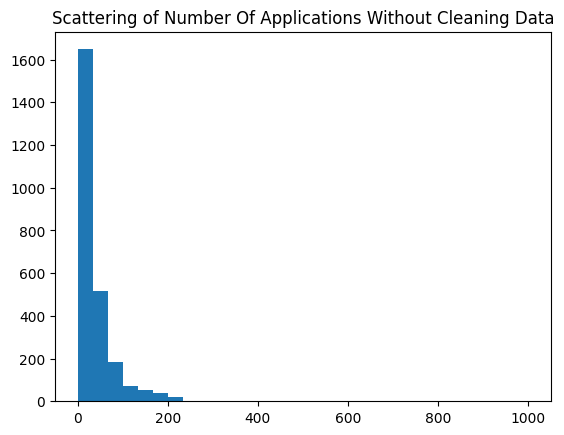

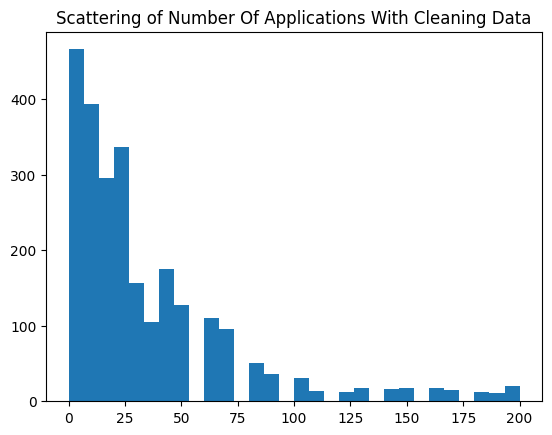

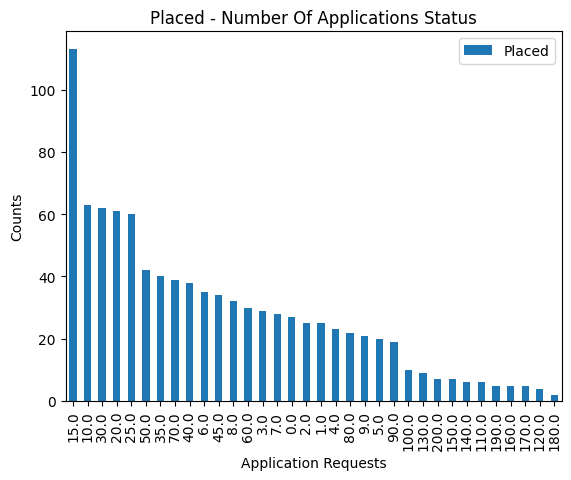

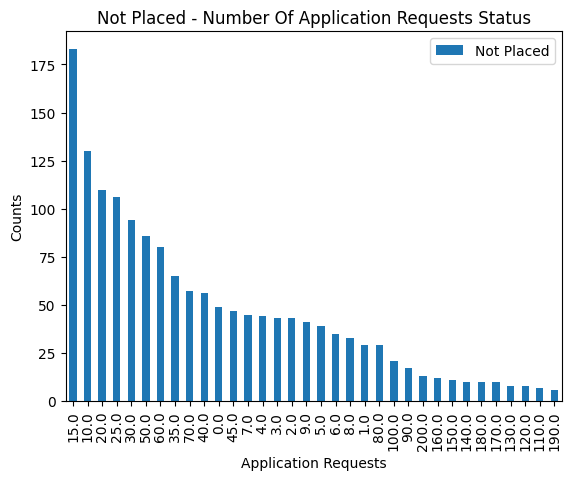

In [2]:
"""
Load data into DataFrame, clean and analyze number of job applications 
for placed and not placed candidates.

Steps:
1. Load data into DataFrame using loadData() function.
2. Prepare Data:
   - Cleaning Data:
     - Drop rows with missing values in 'number_of_applications'.
     - Plot histogram to visualize distribution of number of applications without cleaning the data using matplotlib:
       - Title: 'Scattering of Number Of Applications Without Cleaning Data'
   - Replace values greater than 250 with NaN in 'number_of_applications' column.
     Drop corresponding rows with missing values in 'number_of_applications'.
     Plot histogram again to visualize distribution of number of applications after cleaning the data using matplotlib:
       - Title: 'Scattering of Number Of Applications With Cleaning Data'
3. End Prepare Data
   - End Cleaning Data

4. Initialize analysis using initAnalysis() function to get targetPlaced, 
   dataPlaced, targetNotPlaced, and dataNotPlaced.
5. Extract 'number_of_applications' for placed and not placed candidates.
6. Create DataFrame 'numberApplicationsPlacedDataFrame' showing counts of number of applications 
   for placed candidates and plot a bar chart using matplotlib:
   - X-axis: 'Application Requests'
   - Y-axis: 'Counts'
   - Title: 'Placed - Number Of Applications Status'
7. Create DataFrame 'numberApplicationsNotPlacedDataFrame' showing counts of number of applications 
   for not placed candidates and plot a bar chart using matplotlib:
   - X-axis: 'Application Requests'
   - Y-axis: 'Counts'
   - Title: 'Not Placed - Number Of Application Requests Status'

Note: Requires matplotlib and pandas libraries to be imported.
"""

# Load data into DataFrame
dataFrame = loadData()

# Prepare Data
# Cleaning Data

# Drop rows with missing values in "number_of_applications"
dataFrame = dataFrame.dropna(subset=["number_of_applications"])
# Plot histogram to visualize distribution of number of applications without cleaning the data
plt.title('Scattering of Number Of Applications Without Cleaning Data')
plt.hist(dataFrame["number_of_applications"], bins=30)
plt.show()

# Replace values greater than 250 with NaN and drop corresponding rows
dataFrame["number_of_applications"] = np.where(dataFrame["number_of_applications"] > 250, np.nan, dataFrame["number_of_applications"])
dataFrame = dataFrame.dropna(subset=["number_of_applications"])
# Plot histogram to visualize distribution of number of applications after cleaning the data
plt.title('Scattering of Number Of Applications With Cleaning Data')
plt.hist(dataFrame["number_of_applications"], bins=30)
plt.show()

# End Prepare Data
# End Cleaning Data

# Initialize analysis
targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

# Extract number of applications for placed and not placed groups
numberApplicationsPlaced = dataPlaced["number_of_applications"]
numberApplicationsNotPlaced = dataNotPlaced["number_of_applications"]

# Create DataFrame for placed candidates and plot bar chart
numberApplicationsPlacedDataFrame = pd.DataFrame({
    'Placed': numberApplicationsPlaced.value_counts(),
})
numberApplicationsPlacedDataFrame.plot(kind='bar')
plt.xlabel('Application Requests')
plt.ylabel('Counts')
plt.title('Placed - Number Of Applications Status')
plt.show()

# Create DataFrame for not placed candidates and plot bar chart
numberApplicationsNotPlacedDataFrame = pd.DataFrame({
    'Not Placed': numberApplicationsNotPlaced.value_counts()
})
numberApplicationsNotPlacedDataFrame.plot(kind='bar')
plt.xlabel('Application Requests')
plt.ylabel('Counts')
plt.title('Not Placed - Number Of Application Requests Status')
plt.show()
